#__Notebook - 1__    _Max Mingxuan Xu_

I am personally very interested in the energy market. So, I want to know how the Electric Vehicle Charger developed in California since the EV population seems to have gradually grown in those years. The Charger market also improves fast to reduce the range anxiety for EV users. Tesla even has its 50,000th Supercharger with specail painting installed in Roseville, California.

In [1]:
from IPython.display import Image, display
display(Image(url='https://github.com/max177777/COMPSS-201/blob/main/50k-supercharger.jpg?raw=true', width=500, height=300))

Therefore, my subject area will focus on California. I will assume the EV charger increase two times compared with 5 years before and the total number of chargers will keep increasing in the next few years as my two hypotheses.

In [2]:
# keep importing packages that I use in coding
import pandas
import requests
import altair as alt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

So, I acquired data from California Energy Commission to look for some related data. It can focus on California area and my target.

In [3]:
# meet the wrong file problem and fix by Gemini
url = 'https://github.com/max177777/COMPSS-201/raw/main/EV_Chargers_Last_updated_03-01-2024_ada.xlsx'
response = requests.get(url)
with open('temp_excel_file.xlsx', 'wb') as f:
    f.write(response.content)

In [4]:
# Check the data
DF_charger_2023 = pandas.read_excel("temp_excel_file.xlsx", sheet_name="Q4 2023")
DF_charger_2023

,County,Public Level 1,Shared Private Level 1,Public Level 2,Shared Private Level 2,Public DC Fast,Shared Private DC Fast,Total
0,Alameda,4,72,1590,3667,510,50,5893
1,Alpine,0,0,12,0,0,0,12
2,Amador,0,0,26,0,8,0,34
3,Butte,6,0,72,53,25,1,157
4,Calaveras,0,2,9,0,12,0,23
5,Colusa,0,0,16,3,18,0,37
6,Contra Costa,0,2,678,604,341,7,1632
7,Del Norte,0,0,18,0,28,0,46
8,El Dorado,1,0,166,8,83,0,258
9,Fresno,23,1,476,483,283,26,1292


From the dataset we can find the total number of EV charger is 105666 at California in 2023.

In [5]:
# I want to do the visualization so that I need to remove the total row as an outlier
DF_charger_2023 = DF_charger_2023[:-1]

chart_2023 = alt.Chart(DF_charger_2023).mark_bar().encode(x='County', y='Total')

# Add title and total from the original data
chart_2023 = chart_2023.properties(title={"text": "Total Chargers by County in 2023", "subtitle": f"Total: {105666}"})
chart_2023

alt.Chart(...)

In [6]:
DF_charger_2020 = pandas.read_excel("temp_excel_file.xlsx", sheet_name="Q4 2020")
DF_charger_2020

,County,Public Level 1,Shared Private Level 1,Public Level 2,Shared Private Level 2,Public DC Fast,Shared Private DC Fast,Total
0,Alameda,14,14,1519,1472,296,38,3353
1,Alpine,0,0,14,1,0,0,15
2,Amador,0,0,25,7,8,0,40
3,Butte,6,0,30,22,16,2,76
4,Calaveras,0,0,7,0,0,0,7
5,Colusa,0,0,16,2,10,0,28
6,Contra Costa,8,0,514,658,168,7,1355
7,Del Norte,0,0,10,0,20,0,30
8,El Dorado,1,0,122,6,43,1,173
9,Fresno,8,0,391,333,175,14,921


From the dataset we can find the total number of EV charger is 70479 at California in 2020.

In [7]:
# I want to do the visualization so that I need to remove the total row as an outlier
DF_charger_2020 = DF_charger_2020[:-1]

chart_2020 = alt.Chart(DF_charger_2020).mark_bar().encode(x='County', y='Total')

# Add title and total from the original data
chart_2020 = chart_2020.properties(title={"text": "Total Chargers by County in 2020", "subtitle": f"Total: {70479}"})
chart_2020

alt.Chart(...)

At this point, I find the dataset only includes the EV charger record from 2020 to 2023. So I changed my first hypothesis to 3 years and it is pretty obvious that the increase of EV chargers doesn't hit twice from 2020 to 2023. But I still want to compare the two graphs so that I will overlap their graph to see what I can get.

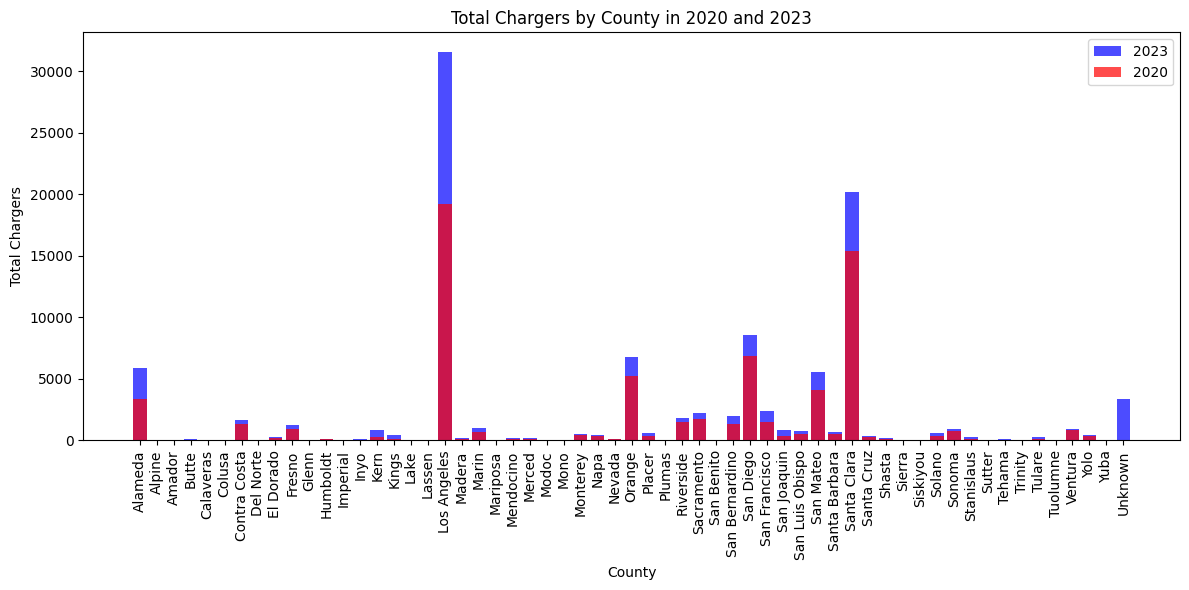

In [8]:
counties_2023 = DF_charger_2023['County']
totals_2023 = DF_charger_2023['Total']

counties_2020 = DF_charger_2020['County']
totals_2020 = DF_charger_2020['Total']

# Overlapping two bar chart
plt.figure(figsize=(12, 6))
plt.bar(counties_2023, totals_2023, label='2023', alpha=0.7,color='blue')
plt.bar(counties_2020, totals_2020, label='2020', alpha=0.7,color='red')

plt.xlabel('County')
plt.ylabel('Total Chargers')
plt.title('Total Chargers by County in 2020 and 2023')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Upon this overlapping graph, we can find actually the Alameda and Los Angeles almost hit the twice increase since they are in or close to the major city. The demand of EV charger and EV is higher than other area. So, I will take out those two region to look at more detail.

In [9]:
# Focus on Alameda and Los Angeles data
alameda_2023 = DF_charger_2023[DF_charger_2023['County'] == 'Alameda']
los_angeles_2023 = DF_charger_2023[DF_charger_2023['County'] == 'Los Angeles']

alameda_2020 = DF_charger_2020[DF_charger_2020['County'] == 'Alameda']
los_angeles_2020 = DF_charger_2020[DF_charger_2020['County'] == 'Los Angeles']

#  comparison
comparison_data = pandas.DataFrame({
    'County': ['Alameda', 'Los Angeles'],
    '2020': [alameda_2020['Total'].values[0], los_angeles_2020['Total'].values[0]],
    '2023': [alameda_2023['Total'].values[0], los_angeles_2023['Total'].values[0]]
})

comparison_data


,County,2020,2023
0,Alameda,3353,5893
1,Los Angeles,19236,31569


Since I did't find the 5 years data, most of ares in California didn't achieve two times increase of EV chargers in last 3 years.

One more thing before I move to the next hypothesis about prediction. Remember the supercharger of Tesla at the very beginning. Tesla actually take a very large market share in EV charger. At this year, they even start to accept other companies' vehicles to use their superchargers, such as Ford Mustand Mach-E and F-150 Lightning vehicles with an adapter to connect the Tesla's NACS charging standard.

So, I think Tesla may spend more time to build the supercharger which is the DC fast charger in the data from California Energy Commission (CMC).

Total Public DC Fast in 2023: 10677
Total Shared Private DC Fast in 2023: 693
Total Public DC Fast in 2020: 5404
Total Shared Private DC Fast in 2020: 559


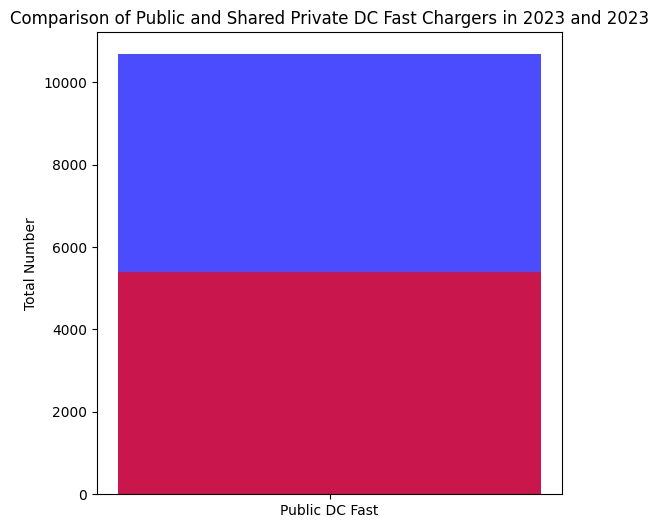

In [10]:
# Compare 'Public DC Fast' and 'Shared Private DC Fast'
total_public_dc_fast_2023 = DF_charger_2023['Public DC Fast'].sum()
total_shared_private_dc_fast_2023 = DF_charger_2023['Shared Private DC Fast'].sum()

print("Total Public DC Fast in 2023:", total_public_dc_fast_2023)
print("Total Shared Private DC Fast in 2023:", total_shared_private_dc_fast_2023)

total_public_dc_fast_2020 = DF_charger_2020['Public DC Fast'].sum()
total_shared_private_dc_fast_2020 = DF_charger_2020['Shared Private DC Fast'].sum()

print("Total Public DC Fast in 2020:", total_public_dc_fast_2020)
print("Total Shared Private DC Fast in 2020:", total_shared_private_dc_fast_2020)

# Visualization
categories = ['Public DC Fast']
totals = [total_public_dc_fast_2023, total_shared_private_dc_fast_2023]

plt.figure(figsize=(6, 6))
plt.bar(categories, total_public_dc_fast_2023, label='2023', alpha=0.7,color='blue')
plt.bar(categories, total_public_dc_fast_2020, label='2020', alpha=0.7,color='red')
plt.ylabel('Total Number')
plt.title('Comparison of Public and Shared Private DC Fast Chargers in 2023 and 2023')
plt.show()


So, it is pretty impressive that the supercharger can have almost two times inprove in the 3 years.

#__Move to the predition__

First, I want to clear my data.

In [11]:
DF_charger_2023_Q4 = pandas.read_excel("temp_excel_file.xlsx", sheet_name="Q4 2023")
DF_charger_2023_Q3 = pandas.read_excel("temp_excel_file.xlsx", sheet_name="Sept 2023")
DF_charger_2023_Q2 = pandas.read_excel("temp_excel_file.xlsx", sheet_name="Q2 2023")
DF_charger_2022_Q4 = pandas.read_excel("temp_excel_file.xlsx", sheet_name="Q4 2022")
DF_charger_2022_Q3 = pandas.read_excel("temp_excel_file.xlsx", sheet_name="Q3 2022")
DF_charger_2022_Q2 = pandas.read_excel("temp_excel_file.xlsx", sheet_name="Q2 2022")
DF_charger_2022_Q1 = pandas.read_excel("temp_excel_file.xlsx", sheet_name="Q1 2022")
DF_charger_2021_Q4 = pandas.read_excel("temp_excel_file.xlsx", sheet_name="Q4 2021")
DF_charger_2021_Q3 = pandas.read_excel("temp_excel_file.xlsx", sheet_name="Q3 2021")
DF_charger_2021_Q2 = pandas.read_excel("temp_excel_file.xlsx", sheet_name="Q2 2021")
DF_charger_2021_Q1 = pandas.read_excel("temp_excel_file.xlsx", sheet_name="Q1 2021")
DF_charger_2020_Q4 = pandas.read_excel("temp_excel_file.xlsx", sheet_name="Q4 2020")
DF_charger_2020_Q3 = pandas.read_excel("temp_excel_file.xlsx", sheet_name="Q3 2020")
DF_charger_2020_Q2 = pandas.read_excel("temp_excel_file.xlsx", sheet_name="Q2 2020")

In [12]:
Q4_2023 = DF_charger_2023_Q4.iloc[-1, -1]
print("The total EV Charger at 2023-Q4:",Q4_2023)
Q3_2023 = DF_charger_2023_Q3.iloc[-1, -1]
print("The total EV Charger at 2023-Q3:",Q3_2023)
Q2_2023 = DF_charger_2023_Q2.iloc[-1, -1]
print("The total EV Charger at 2023-Q2:",Q2_2023)
Q4_2022 = DF_charger_2022_Q4.iloc[-1, -1]
print("The total EV Charger at 2022-Q4:",Q4_2022)
Q3_2022 = DF_charger_2022_Q3.iloc[-1, -1]
print("The total EV Charger at 2022-Q3:",Q3_2022)
Q2_2022 = DF_charger_2022_Q2.iloc[-1, -1]
print("The total EV Charger at 2022-Q2:",Q2_2022)
Q1_2022 = DF_charger_2022_Q1.iloc[-1, -1]
print("The total EV Charger at 2022-Q1:",Q1_2022)
Q4_2021 = DF_charger_2021_Q4.iloc[-1, -1]
print("The total EV Charger at 2021-Q4:",Q4_2021)
Q3_2021 = DF_charger_2021_Q3.iloc[-1, -1]
print("The total EV Charger at 2021-Q3:",Q3_2021)
Q2_2021 = DF_charger_2021_Q2.iloc[-1, -1]
print("The total EV Charger at 2021-Q2:",Q2_2021)
Q1_2021 = DF_charger_2021_Q1.iloc[-1, -1]
print("The total EV Charger at 2021-Q1:",Q1_2021)
Q4_2020 = DF_charger_2020_Q4.iloc[-1, -1]
print("The total EV Charger at 2020-Q4:",Q4_2020)
Q3_2020 = DF_charger_2020_Q3.iloc[-1, -1]
print("The total EV Charger at 2020-Q3:",Q3_2020)
Q2_2020 = DF_charger_2020_Q2.iloc[-1, -1]
print("The total EV Charger at 2020-Q2:",Q2_2020)

The total EV Charger at 2023-Q4: 105666
The total EV Charger at 2023-Q3: 94451
The total EV Charger at 2023-Q2: 92510
The total EV Charger at 2022-Q4: 88267
The total EV Charger at 2022-Q3: 83994
The total EV Charger at 2022-Q2: 79783
The total EV Charger at 2022-Q1: 77310
The total EV Charger at 2021-Q4: 79023
The total EV Charger at 2021-Q3: 76172
The total EV Charger at 2021-Q2: 74459
The total EV Charger at 2021-Q1: 73443
The total EV Charger at 2020-Q4: 70479
The total EV Charger at 2020-Q3: 67343
The total EV Charger at 2020-Q2: 62037


R-squared: 0.9729524431894596


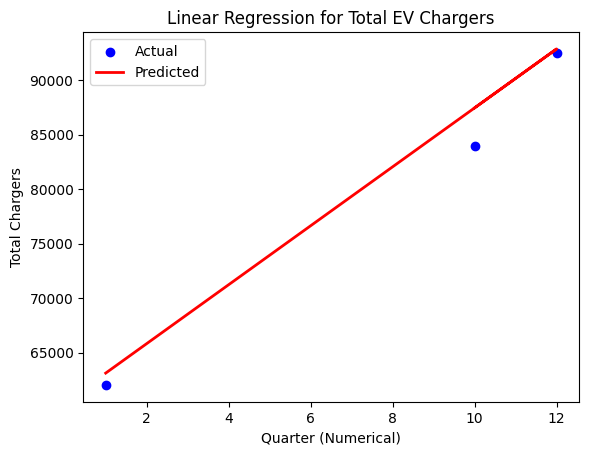

In [13]:
# I want to do a linear regression
data = {'Quarter': ['Q2 2020', 'Q3 2020', 'Q4 2020', 'Q1 2021', 'Q2 2021', 'Q3 2021', 'Q4 2021','Q1 2022', 'Q2 2022', 'Q3 2022', 'Q4 2022', 'Q2 2023', 'Q3 2023', 'Q4 2023'],
        'Total Chargers': [Q2_2020, Q3_2020, Q4_2020, Q1_2021, Q2_2021, Q3_2021, Q4_2021, Q1_2022, Q2_2022, Q3_2022, Q4_2022, Q2_2023, Q3_2023, Q4_2023]}
DF_linear = pandas.DataFrame(data)

# change quarters to numerical values for regression
DF_linear['Quarter_Num'] = range(1, len(DF_linear) + 1)

X = DF_linear[['Quarter_Num']]
y = DF_linear['Total Chargers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# calculate the R2
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Quarter (Numerical)')
plt.ylabel('Total Chargers')
plt.title('Linear Regression for Total EV Chargers')
plt.legend()
plt.show()


In [14]:
# Calculate the correlation coefficient
correlation_coefficient = DF_linear['Quarter_Num'].corr(DF_linear['Total Chargers'])
print("Correlation Coefficient R:", correlation_coefficient)


Correlation Coefficient R: 0.962770339007069


It is a little bit not detial to give the conclusion based on this, but the positive R and linear regression plot can prove there is a positive association so that the EV charger will keep increasing as time moves on.